In [2]:
# df of relevant data only
# correlate GDP and world population
# reconcile different univ ranking year lengths 
# correlate population and univ raning
# correlate GDP and univ ranking

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
world_population = pd.read_csv('datasets\world population\world_population.csv')
world_population.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
# population df by increments of 5 years of useful years only
population_columns = ['Rank','CCA3','Country/Territory',
                        'Capital','Continent','2020 Population']

df_population = world_population.loc[:,population_columns]
df_population = df_population.rename(columns={'Country/Territory':'Country'})
df_population.head().dtypes

Rank                int64
CCA3               object
Country            object
Capital            object
Continent          object
2020 Population     int64
dtype: object

In [6]:
GDP_sector = pd.read_csv('datasets\gdp sector\List of Countries by GDP Sector Composition.csv')
GDP_sector.head()

,Index Number,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Unnamed: 5,Unnamed: 6,Industry,Unnamed: 8,Unnamed: 9,Services,Unnamed: 11,Unnamed: 12,Year GDP,Year Sector
0,NaN,NaN,NaN,NaN,GDP,Rank,% of GDP,GDP,Rank,% of GDP,GDP,Rank,% of GDP,NaN,NaN
1,0.0,1,United States,19360000,174240,3,0.9,3659040,2,18.9,15526720,1,80.2,2017,2017
2,1.0,2,China,11940000,991020,1,8.3,4716300,1,39.5,6232680,2,52.2,2017,2017
3,2.0,3,Japan,4884000,48840,13,1,1450548,3,29.7,3384612,3,69.3,2017,2017
4,3.0,4,Germany,3652000,21912,31,0.6,1099252,4,30.1,2530836,4,69.3,2016,2017


In [7]:
GDP_columns = ['Rank','Country/Economy','GDP (millions of $)']
df_GDP = GDP_sector.loc[:,GDP_columns]
df_GDP.head()

,Rank,Country/Economy,GDP (millions of $)
0,NaN,NaN,NaN
1,1,United States,19360000
2,2,China,11940000
3,3,Japan,4884000
4,4,Germany,3652000


In [8]:
df_GDP = df_GDP.drop(index=0)
df_GDP.head()

,Rank,Country/Economy,GDP (millions of $)
1,1,United States,19360000
2,2,China,11940000
3,3,Japan,4884000
4,4,Germany,3652000
5,5,France,2575000


In [9]:
#df of GDP of only those with values in GDP cells
df_GDP = df_GDP.reset_index(drop=True)
df_GDP = df_GDP[~df_GDP['GDP (millions of $)'].str.contains('-')]
df_GDP = df_GDP.rename(columns={'Country/Economy':'Country'})
df_GDP.head().dtypes

Rank                   object
Country                object
GDP (millions of $)    object
dtype: object

In [10]:
df_GDP['Rank'] = df_GDP['Rank'].astype(int)
df_GDP['GDP (millions of $)'] = df_GDP['GDP (millions of $)'].astype(int)

df_GDP.dtypes

Rank                    int32
Country                object
GDP (millions of $)     int32
dtype: object

df of university rankings of useable years only

### GreenMetric

In [11]:
#GreenMetric

greenmetric = pd.read_csv(r'datasets\universitry ranking\GreenMetric\GreenMetric_2020-.csv')
greenmetric.head()

,University,Country,Total Score,Setting & Infrastructure,Energy & Climate Change,Waste,Water,Transportation,Education & Research,Rank
0,Wageningen University & Research,Netherland,9150,1200,1800,1800,1000,1550,1800,1
1,University of Oxford,United Kingdom,8875,1200,1600,1800,1000,1550,1725,2
2,University of Nottingham,United Kingdom,8775,1300,1525,1800,1000,1425,1725,3
3,Nottingham Trent University,United Kingdom,8725,1200,1775,1800,700,1450,1800,4
4,"University of California, Davis",USA,8725,1250,1575,1725,1000,1525,1650,5


In [12]:
greenmetric_columns = ['University','Rank','Country']
df_greenmetric = greenmetric.loc[:,greenmetric_columns]
df_greenmetric.head()

,University,Rank,Country
0,Wageningen University & Research,1,Netherland
1,University of Oxford,2,United Kingdom
2,University of Nottingham,3,United Kingdom
3,Nottingham Trent University,4,United Kingdom
4,"University of California, Davis",5,USA


### CWUR

In [13]:
#CWUR

CWUR = pd.read_csv(r'datasets\universitry ranking\CWUR\CWUR_2020-2021.csv')
CWUR.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Performance,Score
0,1,Harvard University,USA,1,3,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,11,2,7,96.7
2,3,Stanford University,USA,3,10,4,3,2,95.2
3,4,University of Cambridge,United Kingdom,1,1,21,4,11,94.1
4,5,University of Oxford,United Kingdom,2,7,26,9,4,93.3


In [14]:
CWUR_columns = ['Institution','World Rank','Location']
df_cwur = CWUR.loc[:,CWUR_columns]
df_cwur = df_cwur.rename(columns={'Institution':'University','World Rank':'Rank','Location':'Country'})
df_cwur.head()

,University,Rank,Country
0,Harvard University,1,USA
1,Massachusetts Institute of Technology,2,USA
2,Stanford University,3,USA
3,University of Cambridge,4,United Kingdom
4,University of Oxford,5,United Kingdom


### Leiden

In [15]:
# Leiden

Leiden = pd.read_csv(r'datasets\universitry ranking\Leiden\Leiden_2020.csv')
Leiden.head()

,Rank,Country,University,P,P(top 50%),PP(top 50%)
0,1,United States,Harvard Univ,33722,22423,66.5
1,2,China,Shanghai Jiao Tong Univ,24180,12565,52.0
2,3,China,Zhejiang Univ,23510,12444,52.9
3,4,Canada,Univ Toronto,22995,13347,58.0
4,5,China,Tsinghua Univ,19902,11396,57.3


In [16]:
Leiden_columns = ['University','Rank','Country']
df_leiden = Leiden.loc[:, Leiden_columns]
df_leiden.head()

,University,Rank,Country
0,Harvard Univ,1,United States
1,Shanghai Jiao Tong Univ,2,China
2,Zhejiang Univ,3,China
3,Univ Toronto,4,Canada
4,Tsinghua Univ,5,China


### NatureIndex

In [17]:
#NatureIndex

natureindex = pd.read_csv(r'datasets\universitry ranking\NatureIndex\NatureIndex_2020.csv')
natureindex.head()

,2020,Institution,Country,Share 2019,Share 2020,Count 2020,Change Adjusted in Share 2019-2020
0,1,Harvard University,United States of America (USA),923.94,927.26,2569,-3.2
1,2,Stanford University,United States of America (USA),647.66,638.05,1687,-5.0
2,3,Massachusetts Institute of Technology (MIT),United States of America (USA),561.57,526.26,1841,-9.6
3,4,The University of Tokyo (UTokyo),Japan,431.41,461.85,1308,3.2
4,5,University of Oxford,United Kingdom (UK),455.82,458.80,1437,-2.9


In [18]:
natureindex_columns = ['Institution','2020','Country']
df_natureindex = natureindex.loc[:,natureindex_columns]
df_natureindex = df_natureindex.rename(columns={'Institution':'University','2020':'Rank','Country':'Country'})
df_natureindex.head()

,University,Rank,Country
0,Harvard University,1,United States of America (USA)
1,Stanford University,2,United States of America (USA)
2,Massachusetts Institute of Technology (MIT),3,United States of America (USA)
3,The University of Tokyo (UTokyo),4,Japan
4,University of Oxford,5,United Kingdom (UK)


### Times

In [19]:
#Times

Times = pd.read_csv(r'datasets\universitry ranking\Times\Times_2020.csv')
Times.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,disabled
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,...,United Kingdom,"20,665",11.2,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,False
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,...,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,False
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,...,United Kingdom,"18,980",10.9,37%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,False
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,...,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,False
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,...,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,False


In [20]:
Times_columns = ['name','rank','location']
df_times = Times.loc[:,Times_columns]
df_times = df_times.rename(columns={'name':'University','rank':'Rank','location':'Country'})
df_times

,University,Rank,Country
0,University of Oxford,1,United Kingdom
1,California Institute of Technology,2,United States
2,University of Cambridge,3,United Kingdom
3,Stanford University,4,United States
4,Massachusetts Institute of Technology,5,United States
...,...,...,...
1392,Yuan Ze University,1001+,Taiwan
1393,Zagazig University,1001+,Egypt
1394,University of Zagreb,1001+,Croatia
1395,University of Zanjan,1001+,Iran


In [21]:
df_times['Rank'] = pd.to_numeric(df_times['Rank'], errors='coerce')
df_times['Rank'] = df_times['Rank'].replace(1001, np.nan)
df_times['Rank'] = df_times['Rank'].fillna(np.nan).astype(float).astype('Int64')
df_times.head()

,University,Rank,Country
0,University of Oxford,1,United Kingdom
1,California Institute of Technology,2,United States
2,University of Cambridge,3,United Kingdom
3,Stanford University,4,United States
4,Massachusetts Institute of Technology,5,United States


### URAP

In [22]:
# URAP

URAP  = pd.read_csv(r'datasets\universitry ranking\URAP\URAP_2020-2021.csv')
URAP.head()

,Rank,University,Country,Article,Citation,Total Document,AIT,CIT,Collaboration,Total
0,1,Harvard University,United States of America,126.00,126.00,60.00,108.00,90.00,90.00,600.00
1,2,University of Toronto,Canada,124.21,122.90,59.00,105.13,83.79,89.00,584.03
2,3,Stanford University,United States of America,118.03,125.00,55.65,107.00,89.00,81.89,576.57
3,4,University College London,United Kingdom,120.40,121.29,57.37,104.68,83.87,88.87,576.49
4,5,University of Oxford,United Kingdom,117.88,121.70,55.98,104.91,85.24,88.50,574.21


In [23]:
URAP_columns = ['University','Rank','Country']
df_urap = URAP.loc[:,URAP_columns]
df_urap.head()

,University,Rank,Country
0,Harvard University,1,United States of America
1,University of Toronto,2,Canada
2,Stanford University,3,United States of America
3,University College London,4,United Kingdom
4,University of Oxford,5,United Kingdom


### Webometrics

In [24]:
#Webometrics

Webometrics = pd.read_csv(r'datasets\universitry ranking\Webometrics\Webometric_2020.csv')
Webometrics.head()

,ranking,University,Country,Impact Rank,Openness Rank,Excellence Rank
0,1,Harvard University,United States,1,2,1
1,2,Stanford University,United States,3,3,2
2,3,Massachusetts Institute of Technology,United States,2,1,4
3,4,University of California Berkeley,United States,18,4,3
4,5,University of Washington,United States,25,5,56


In [25]:
webometrics_columns = ['University','ranking','Country']
df_webometrics = Webometrics.loc[:,webometrics_columns]
df_webometrics = df_webometrics.rename(columns={'University':'University','ranking':'Rank','Country':'Country'})
df_webometrics.head()

,University,Rank,Country
0,Harvard University,1,United States
1,Stanford University,2,United States
2,Massachusetts Institute of Technology,3,United States
3,University of California Berkeley,4,United States
4,University of Washington,5,United States


## Correlation Analysis 

### university ranking merge with GDP

In [26]:
# Merge university ranking with GDP

# greenmetric
df_greenmetric_gdp = pd.merge(df_greenmetric, df_GDP, on='Country', how='inner')

#CWUR
df_cwur_gdp = pd.merge(df_cwur, df_GDP, on='Country', how='inner')

#Leiden
df_leiden_gdp = pd.merge(df_leiden, df_GDP, on='Country', how='inner')

# NatureIndex
df_natureindex_gdp = pd.merge(df_natureindex, df_GDP, on='Country', how='inner')

#Times
df_times_gdp = pd.merge(df_times, df_GDP, on='Country', how='inner')

#URAP
df_urap_gdp = pd.merge(df_urap, df_GDP, on='Country', how='inner')

#Webometrics
df_webometrics_gdp = pd.merge(df_webometrics, df_GDP, on='Country', how='inner')

### university ranking merge with population

In [27]:
# Merge university ranking with population

# greenmetric
df_greenmetric_population = pd.merge(df_greenmetric, df_population, on='Country', how='inner')

#CWUR
df_cwur_population = pd.merge(df_cwur, df_population, on='Country', how='inner')

#Leiden
df_leiden_population = pd.merge(df_leiden, df_population, on='Country', how='inner')

# NatureIndex
df_natureindex_population = pd.merge(df_natureindex, df_population, on='Country', how='inner')

#Times
df_times_population = pd.merge(df_times, df_population, on='Country', how='inner')

#URAP
df_urap_population = pd.merge(df_urap, df_population, on='Country', how='inner')

#Webometrics
df_webometrics_population = pd.merge(df_webometrics, df_population, on='Country', how='inner')


In [28]:
df_greenmetric_gdp.head()

,University,Rank_x,Country,Rank_y,GDP (millions of $)
0,University of Oxford,2,United Kingdom,6,2565000
1,University of Nottingham,3,United Kingdom,6,2565000
2,Nottingham Trent University,4,United Kingdom,6,2565000
3,University of Warwick,29,United Kingdom,6,2565000
4,Keele University,37,United Kingdom,6,2565000


In [29]:
df_greenmetric_population.head()

,University,Rank_x,Country,Rank_y,CCA3,Capital,Continent,2020 Population
0,University of Oxford,2,United Kingdom,21,GBR,London,Europe,67059474
1,University of Nottingham,3,United Kingdom,21,GBR,London,Europe,67059474
2,Nottingham Trent University,4,United Kingdom,21,GBR,London,Europe,67059474
3,University of Warwick,29,United Kingdom,21,GBR,London,Europe,67059474
4,Keele University,37,United Kingdom,21,GBR,London,Europe,67059474


In [30]:
df_times_gdp

,University,Rank_x,Country,Rank_y,GDP (millions of $)
0,University of Oxford,1,United Kingdom,6,2565000
1,University of Cambridge,3,United Kingdom,6,2565000
2,Imperial College London,10,United Kingdom,6,2565000
3,UCL,15,United Kingdom,6,2565000
4,London School of Economics and Political Science,<NA>,United Kingdom,6,2565000
...,...,...,...,...,...
1301,National University of Cuyo,<NA>,Argentina,21,619900
1302,National University of San Martín,<NA>,Argentina,21,619900
1303,National University of the South,<NA>,Argentina,21,619900
1304,Sofia University,<NA>,Bulgaria,80,55950


In [31]:
df_times_population

,University,Rank_x,Country,Rank_y,CCA3,Capital,Continent,2020 Population
0,University of Oxford,1,United Kingdom,21,GBR,London,Europe,67059474
1,University of Cambridge,3,United Kingdom,21,GBR,London,Europe,67059474
2,Imperial College London,10,United Kingdom,21,GBR,London,Europe,67059474
3,UCL,15,United Kingdom,21,GBR,London,Europe,67059474
4,London School of Economics and Political Science,<NA>,United Kingdom,21,GBR,London,Europe,67059474
...,...,...,...,...,...,...,...,...
1349,National University of Cuyo,<NA>,Argentina,33,ARG,Buenos Aires,South America,45036032
1350,National University of San Martín,<NA>,Argentina,33,ARG,Buenos Aires,South America,45036032
1351,National University of the South,<NA>,Argentina,33,ARG,Buenos Aires,South America,45036032
1352,Sofia University,<NA>,Bulgaria,108,BGR,Sofia,Europe,6979175


### merge univ ranking with gdp and population

In [32]:
# Merge university ranking with population with gdp

# greenmetric
df_greenmetric_popugdp = pd.merge(df_greenmetric_gdp, df_population, on='Country', how='inner')

#CWUR
df_cwur_popugdp = pd.merge(df_cwur_gdp, df_population, on='Country', how='inner')

#Leiden
df_leiden_popugdp = pd.merge(df_leiden_gdp, df_population, on='Country', how='inner')

# NatureIndex
df_natureindex_popugdp = pd.merge(df_natureindex_gdp, df_population, on='Country', how='inner')

#Times
df_times_popugdp = pd.merge(df_times_gdp, df_population, on='Country', how='inner')

#URAP
df_urap_popugdp = pd.merge(df_urap_gdp, df_population, on='Country', how='inner')

#Webometrics
df_webometrics_popugdp = pd.merge(df_webometrics_gdp, df_population, on='Country', how='inner')


In [33]:
df_greenmetric_popugdp.head()

,University,Rank_x,Country,Rank_y,GDP (millions of $),Rank,CCA3,Capital,Continent,2020 Population
0,University of Oxford,2,United Kingdom,6,2565000,21,GBR,London,Europe,67059474
1,University of Nottingham,3,United Kingdom,6,2565000,21,GBR,London,Europe,67059474
2,Nottingham Trent University,4,United Kingdom,6,2565000,21,GBR,London,Europe,67059474
3,University of Warwick,29,United Kingdom,6,2565000,21,GBR,London,Europe,67059474
4,Keele University,37,United Kingdom,6,2565000,21,GBR,London,Europe,67059474


### exploring the data

In [35]:
df_greenmetric_popugdp.describe()

,Rank_x,Rank_y,GDP (millions of $),Rank,2020 Population
count,835.000000,835.000000,8.350000e+02,835.000000,8.350000e+02
mean,468.985629,31.450299,8.650864e+05,30.200000,1.482123e+08
std,261.836760,23.609246,9.663229e+05,31.800894,2.556189e+08
min,2.000000,2.000000,5.054000e+03,1.000000,5.153570e+05
25%,247.000000,14.000000,2.632000e+05,8.500000,4.255698e+07
50%,471.000000,26.000000,4.378000e+05,20.000000,7.147566e+07
75%,697.500000,42.000000,1.307000e+06,35.000000,1.565191e+08
max,912.000000,163.000000,1.194000e+07,173.000000,1.424930e+09


In [65]:
df_greenmetric_popugdp.corr(method='spearman')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\2163579384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_greenmetric_popugdp.corr(method='spearman')


,Rank_x,Rank_y,GDP (millions of $),Rank,2020 Population
Rank_x,1.000000,0.230640,-0.230640,-0.096114,0.092351
Rank_y,0.230640,1.000000,-1.000000,0.603896,-0.602608
GDP (millions of $),-0.230640,-1.000000,1.000000,-0.603896,0.602608
Rank,-0.096114,0.603896,-0.603896,1.000000,-0.999023
2020 Population,0.092351,-0.602608,0.602608,-0.999023,1.000000


fixing df_times_popugdp Rank_x

In [36]:
df_times_popugdp.dtypes

University             object
Rank_x                  Int64
Country                object
Rank_y                  int32
GDP (millions of $)     int32
Rank                    int64
CCA3                   object
Capital                object
Continent              object
2020 Population         int64
dtype: object

### heatmap visualization

pearson corr

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\467231192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_greenmetric_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'GreenMetric')

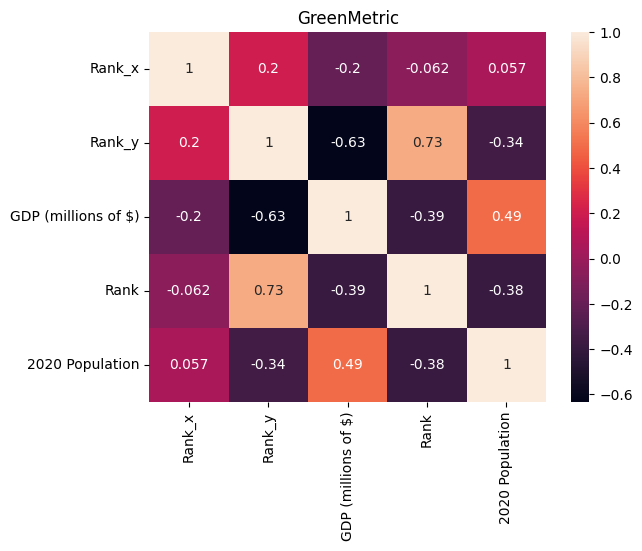

In [37]:
# GreenMetric
sns.heatmap(df_greenmetric_popugdp.corr(), annot=True)
plt.title('GreenMetric')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\2962794940.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cwur_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'CWUR')

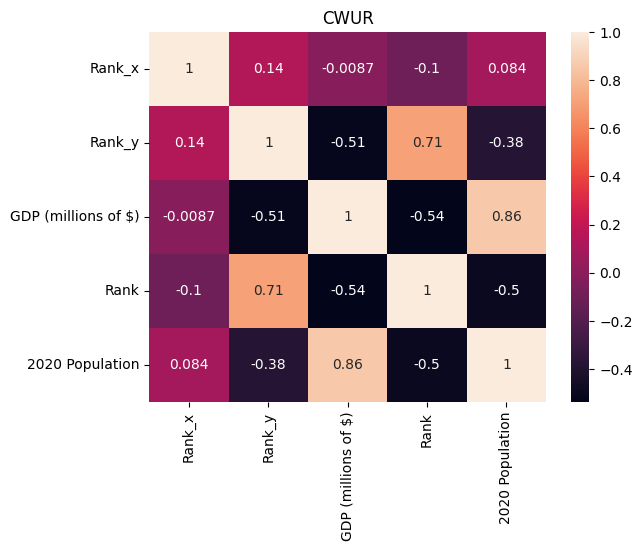

In [38]:
# CWUR

sns.heatmap(df_cwur_popugdp.corr(), annot=True)
plt.title('CWUR')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\3113309422.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_leiden_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'Leiden')

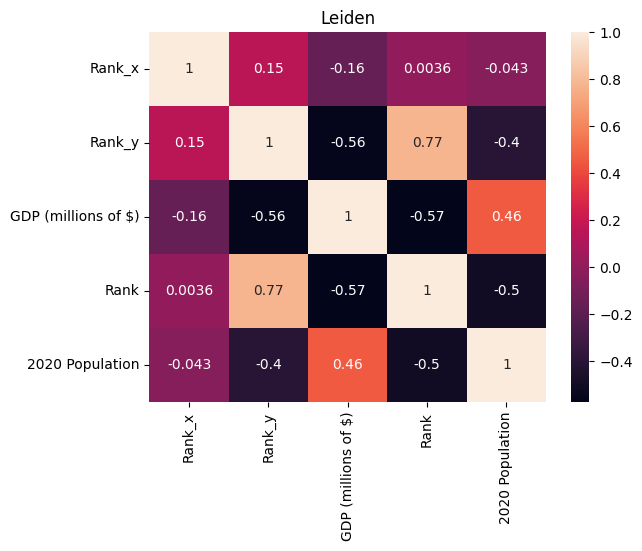

In [39]:
# Leiden

sns.heatmap(df_leiden_popugdp.corr(), annot=True)
plt.title('Leiden')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\3492357092.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_natureindex_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'NatureIndex')

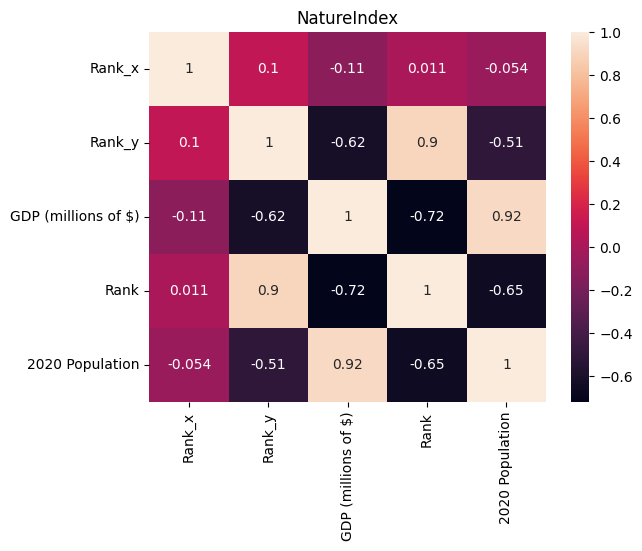

In [40]:
# NatureIndex

sns.heatmap(df_natureindex_popugdp.corr(), annot=True)
plt.title("NatureIndex")

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\2154118181.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_times_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'Times')

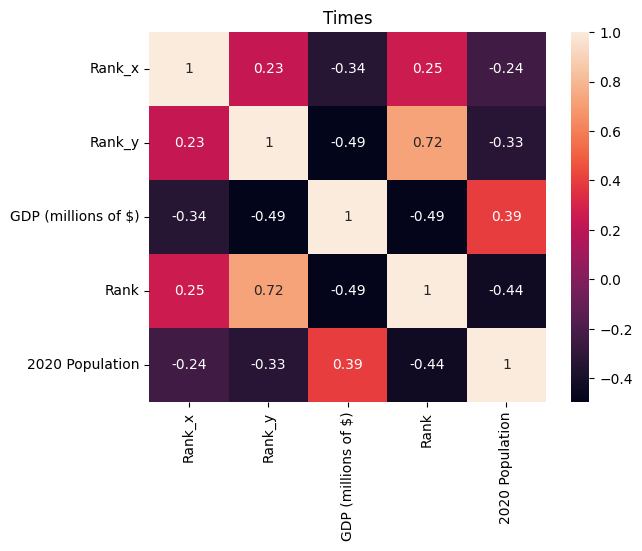

In [41]:
# Times

sns.heatmap(df_times_popugdp.corr(), annot=True)
plt.title('Times')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\375102361.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_urap_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'URAP')

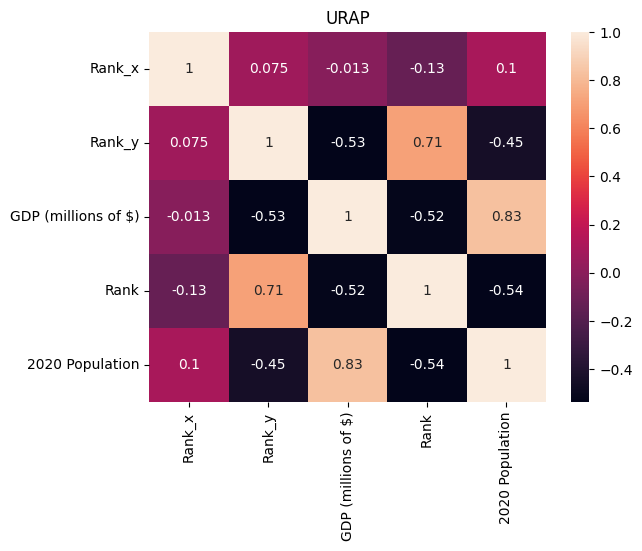

In [42]:
#URAP

sns.heatmap(df_urap_popugdp.corr(), annot=True)
plt.title('URAP')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\65169604.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_webometrics_popugdp.corr(), annot=True)


Text(0.5, 1.0, 'Webometrics')

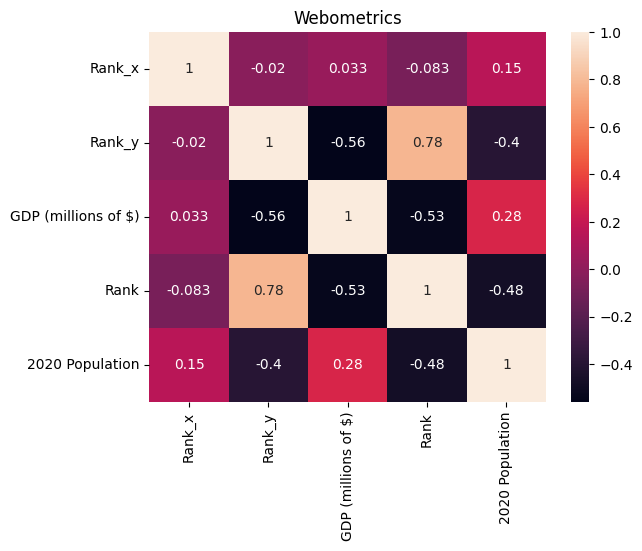

In [43]:
#Webometrics

sns.heatmap(df_webometrics_popugdp.corr(), annot=True)
plt.title('Webometrics')

spearman corr

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\964999785.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cwur_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'CWUR - Spearman Corr.')

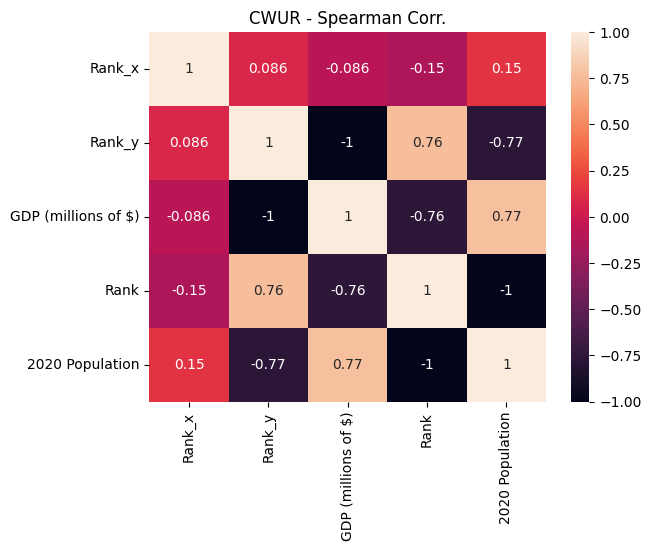

In [69]:
sns.heatmap(df_cwur_popugdp.corr(method='spearman'), annot= True)
plt.title('CWUR - Spearman Corr.')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\1334514614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_greenmetric_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'GreenMetric - Spearman Corr.')

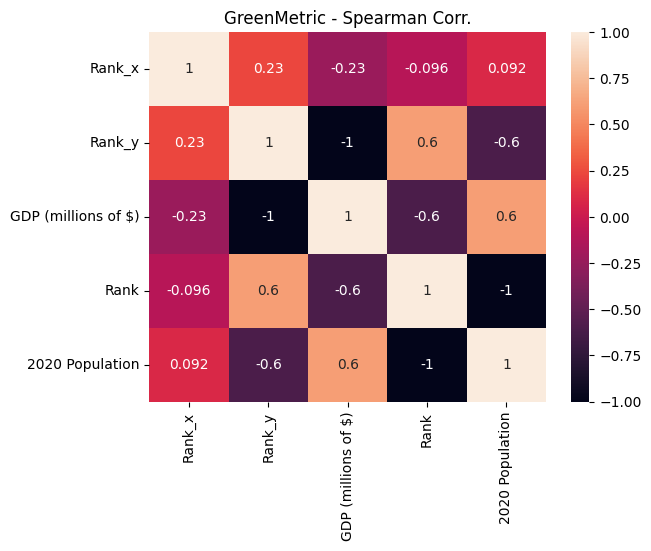

In [70]:
sns.heatmap(df_greenmetric_popugdp.corr(method='spearman'), annot= True)
plt.title('GreenMetric - Spearman Corr.')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\414490463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_leiden_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'Leiden - Spearman Corr.')

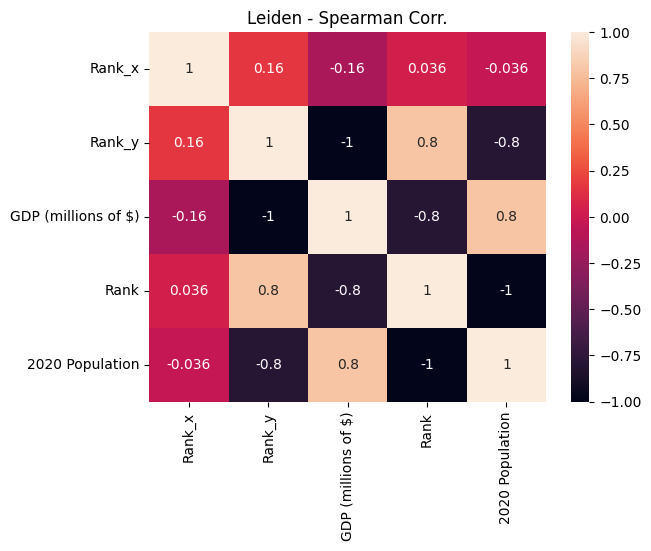

In [71]:
sns.heatmap(df_leiden_popugdp.corr(method='spearman'), annot= True)
plt.title('Leiden - Spearman Corr.')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\602596627.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_natureindex_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'NatureIndex - Spearman Corr.')

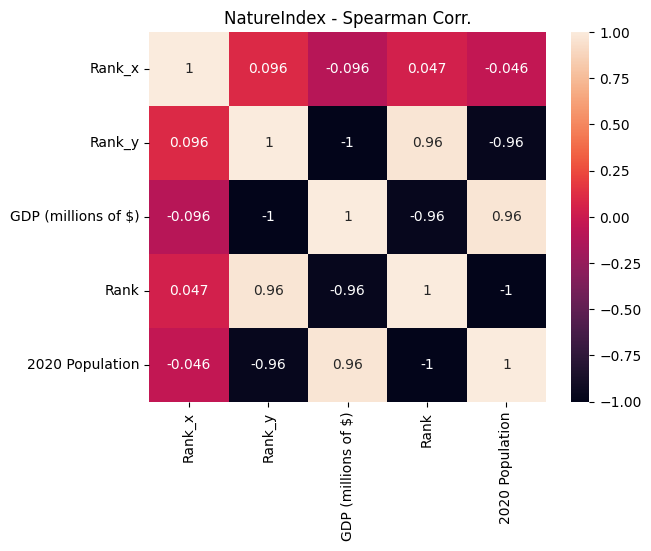

In [72]:
sns.heatmap(df_natureindex_popugdp.corr(method='spearman'), annot= True)
plt.title('NatureIndex - Spearman Corr.')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\607423479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_times_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'Times - Spearman Corr.')

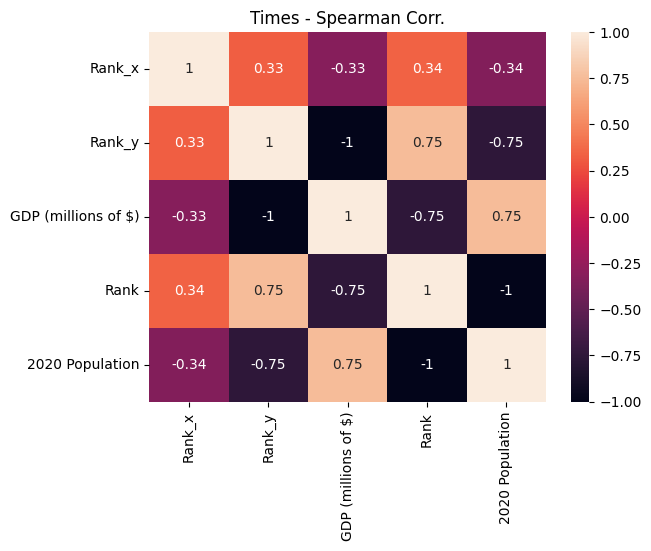

In [73]:
sns.heatmap(df_times_popugdp.corr(method='spearman'), annot= True)
plt.title('Times - Spearman Corr.')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\633123813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_urap_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'URAP - Spearman Corr.')

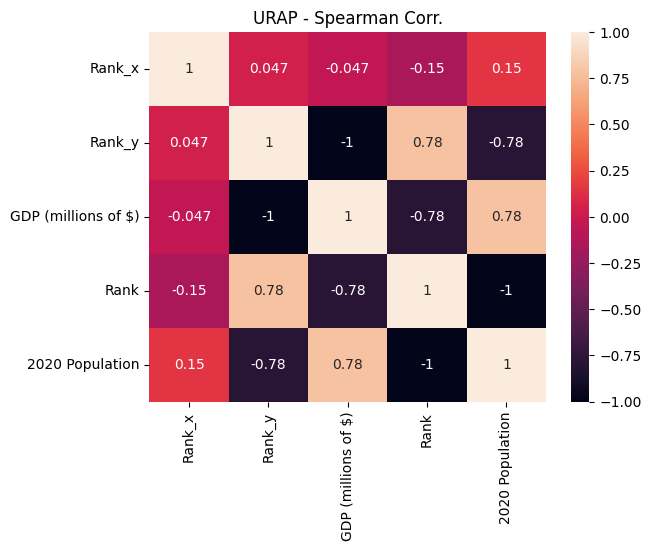

In [74]:
sns.heatmap(df_urap_popugdp.corr(method='spearman'), annot= True)
plt.title('URAP - Spearman Corr.')

C:\Users\enzo\AppData\Local\Temp\ipykernel_3308\2449559484.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_webometrics_popugdp.corr(method='spearman'), annot= True)


Text(0.5, 1.0, 'Webometrics - Spearman Corr.')

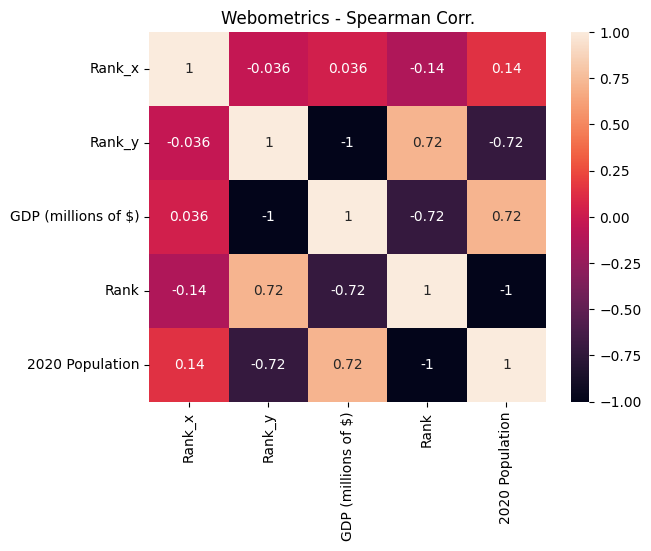

In [75]:
sns.heatmap(df_webometrics_popugdp.corr(method='spearman'), annot= True)
plt.title('Webometrics - Spearman Corr.')

### univ ranking, gdp, population visualizations

Text(0.5, 1.0, 'GreenMetric')

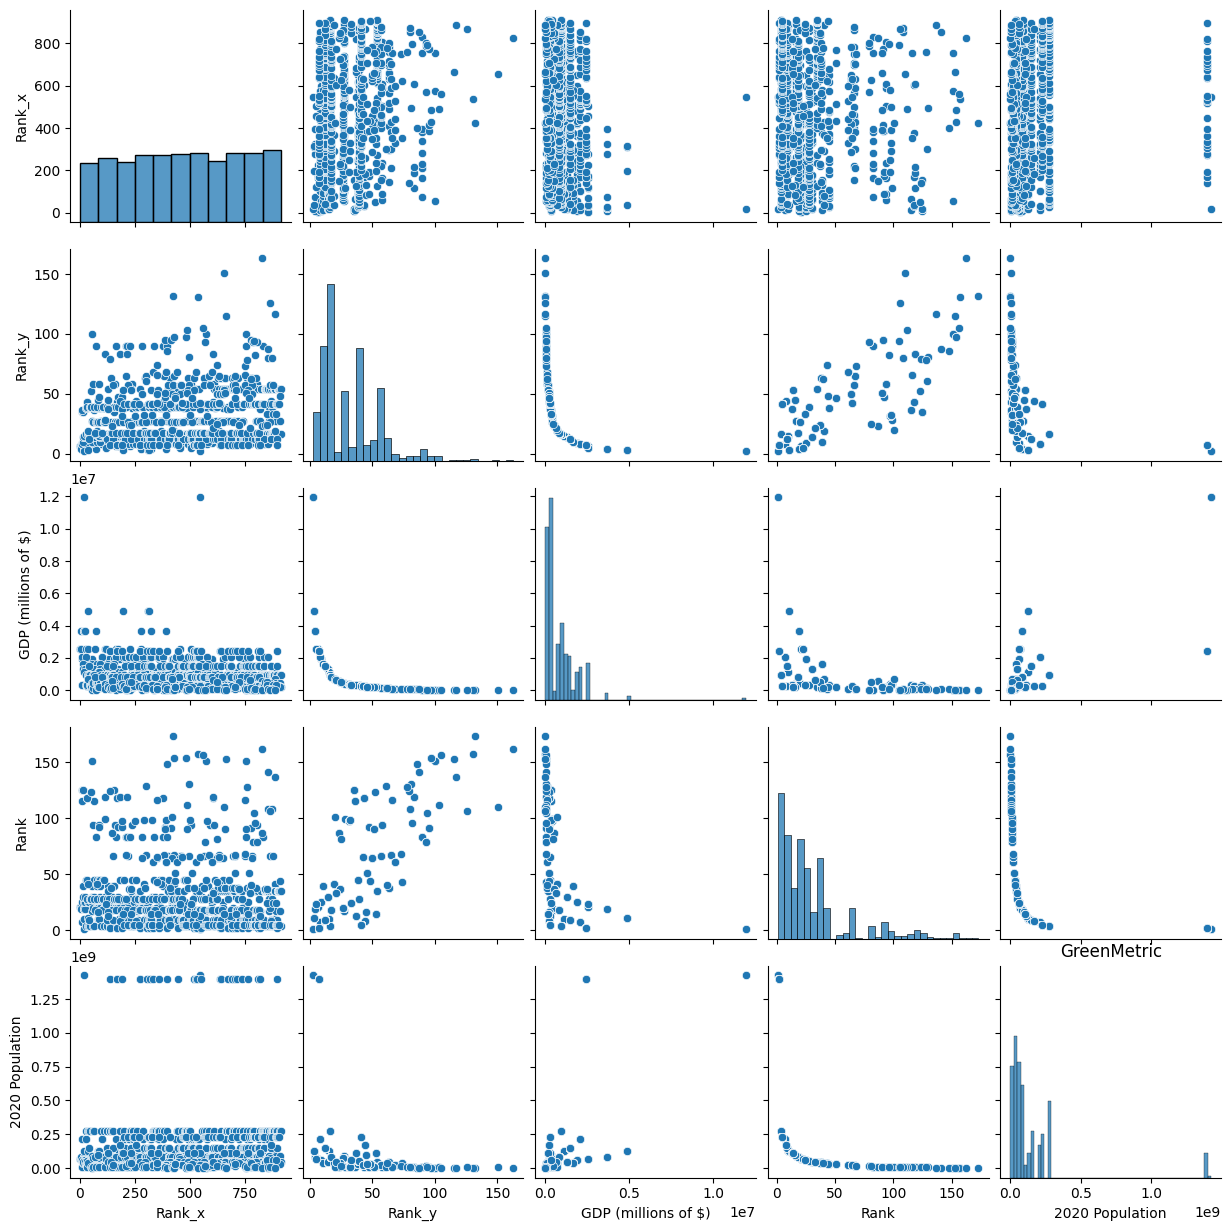

In [76]:
sns.pairplot(df_greenmetric_popugdp)
plt.title('GreenMetric')

Text(0.5, 1.0, 'CWUR')

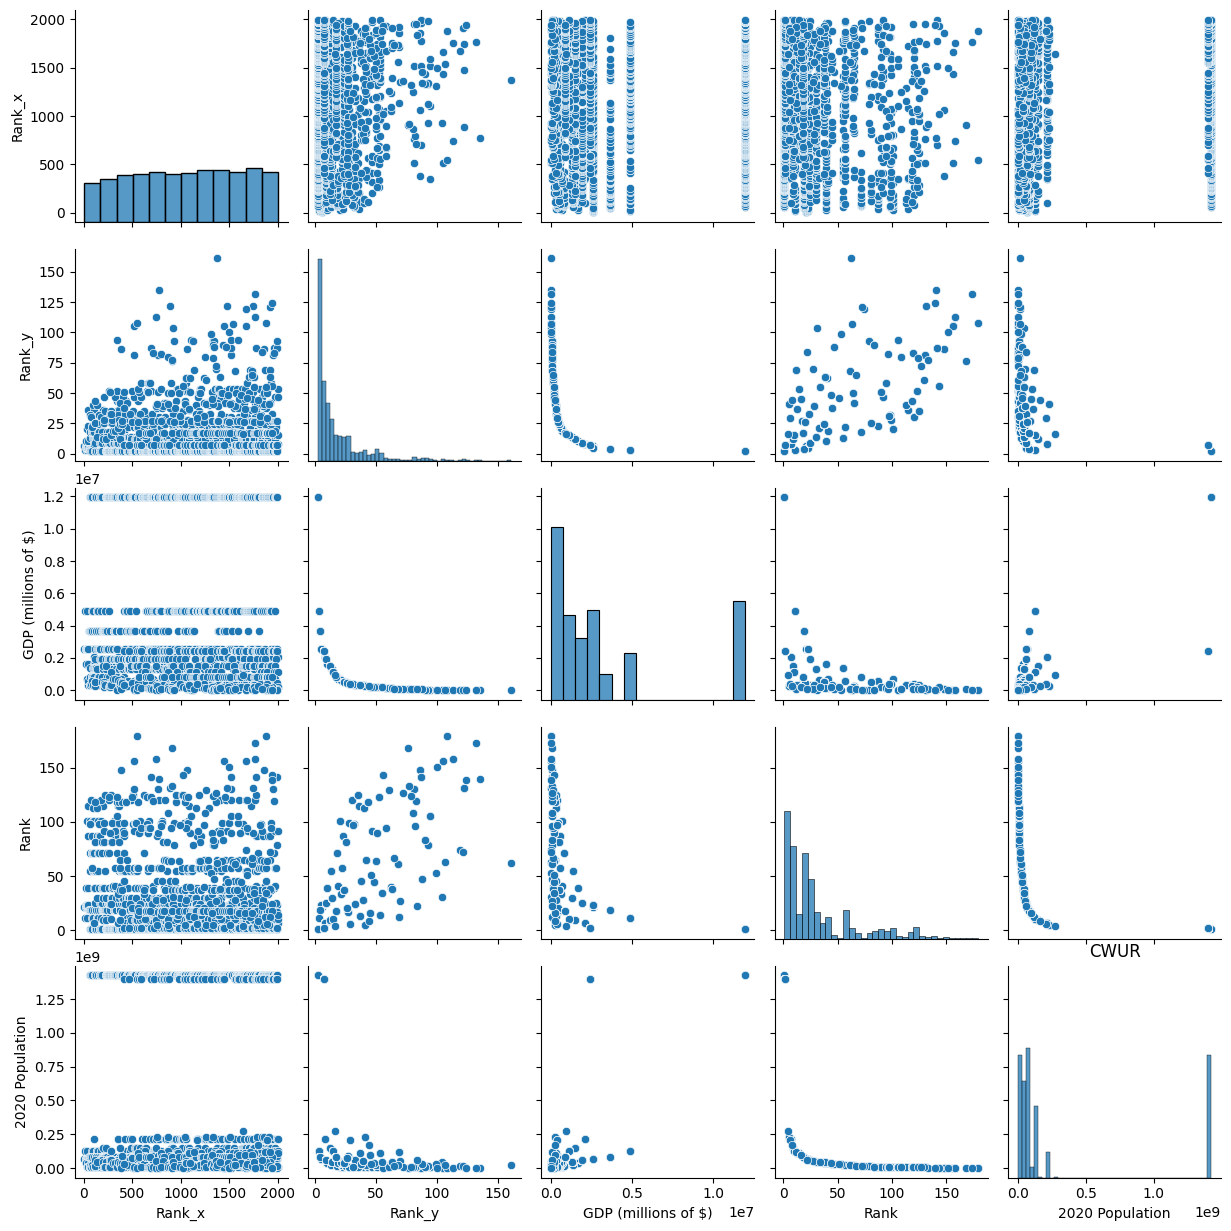

In [77]:
sns.pairplot(df_cwur_popugdp)
plt.title('CWUR')

Text(0.5, 1.0, 'Leiden')

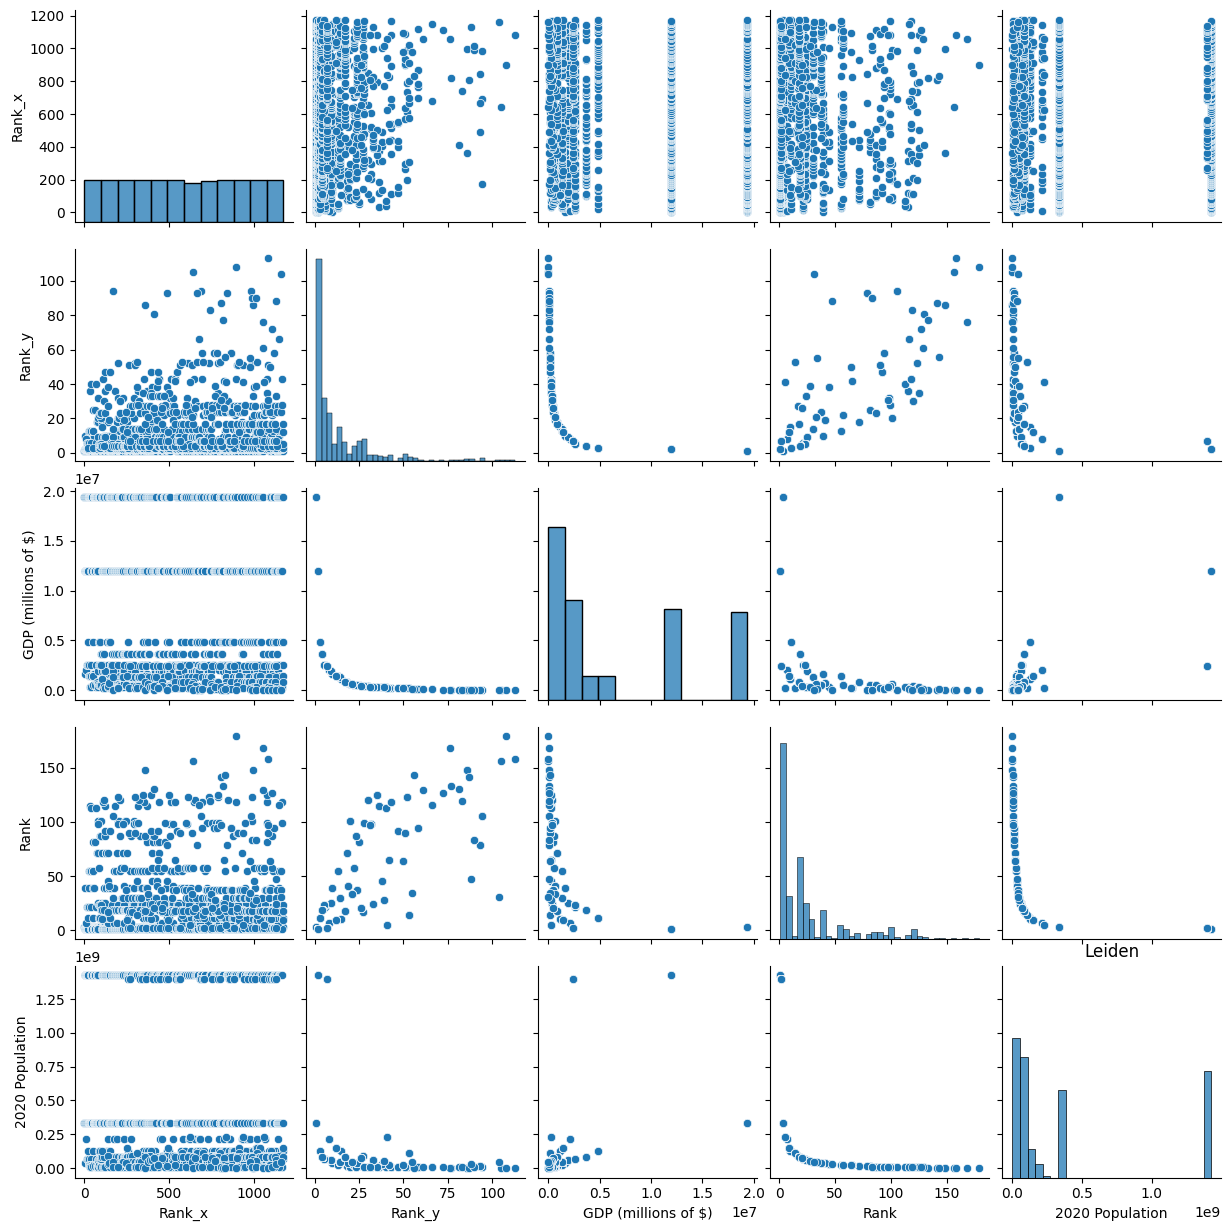

In [78]:
sns.pairplot(df_leiden_popugdp)
plt.title('Leiden')

Text(0.5, 1.0, 'NatureIndex')

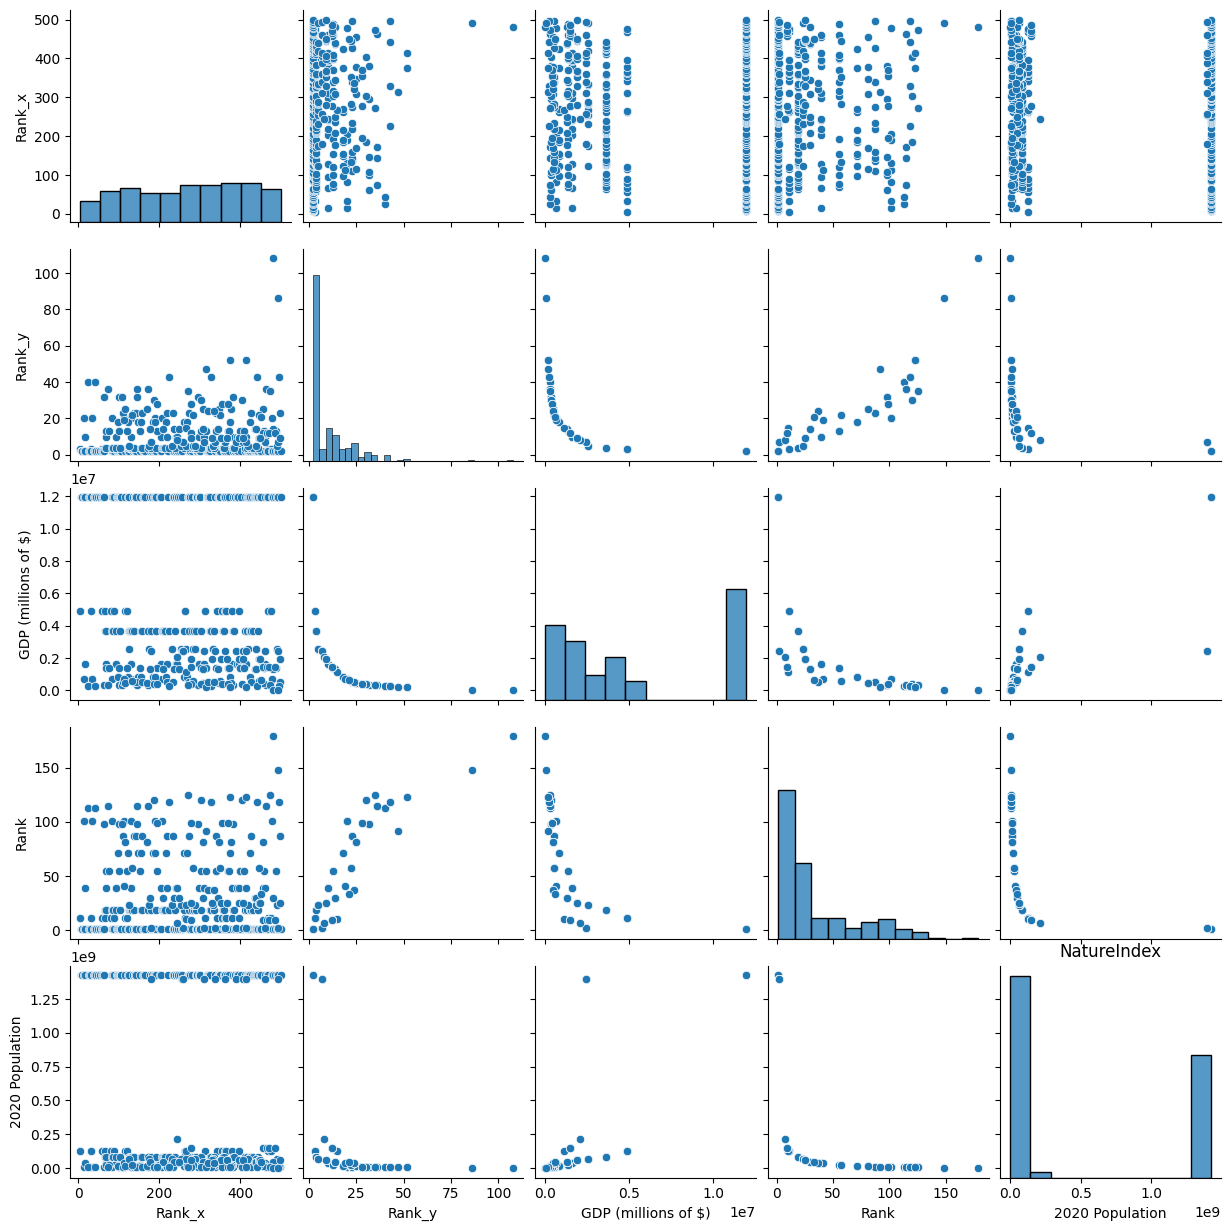

In [79]:
sns.pairplot(df_natureindex_popugdp)
plt.title('NatureIndex')

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


Text(0.5, 1.0, 'Times')

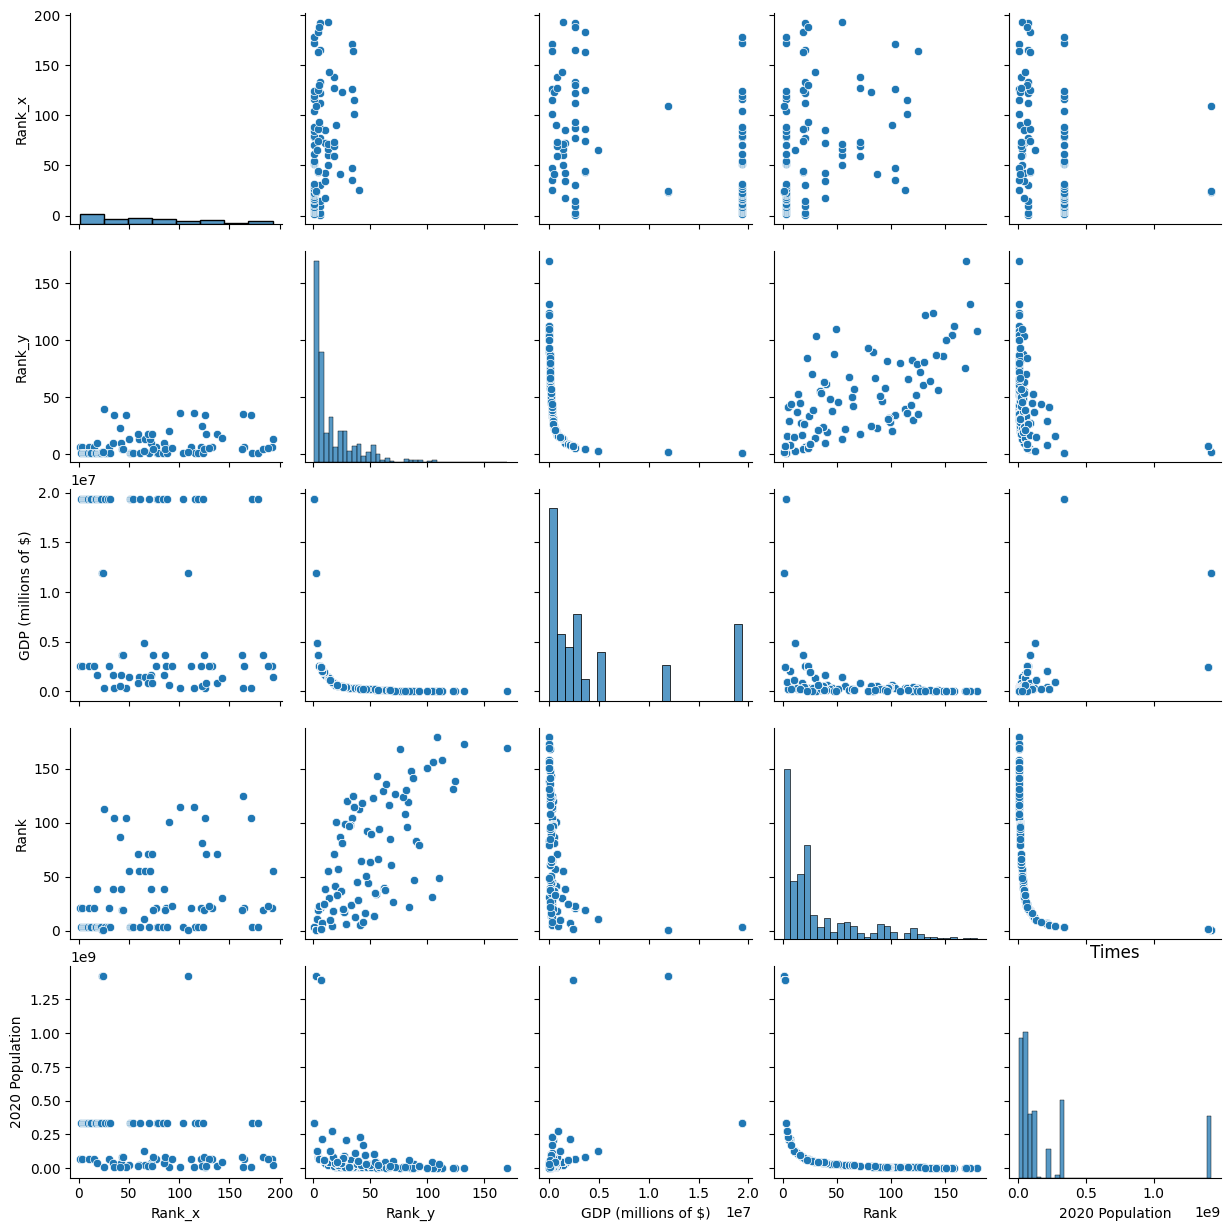

In [80]:
sns.pairplot(df_times_popugdp)
plt.title('Times')

Text(0.5, 1.0, 'URAP')

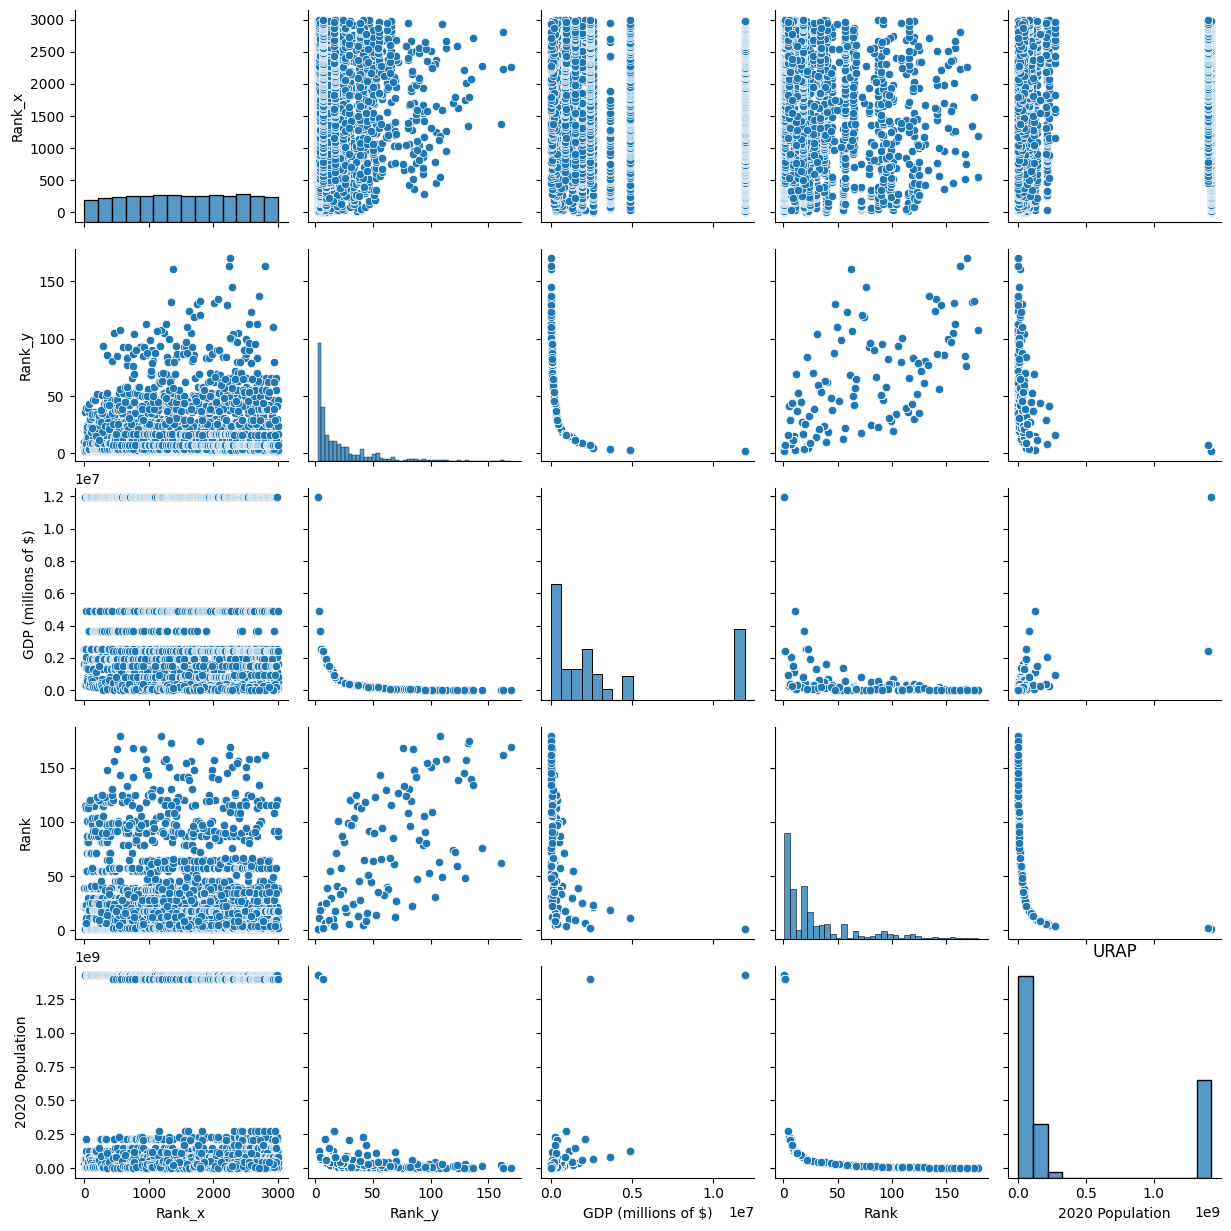

In [81]:
sns.pairplot(df_urap_popugdp)
plt.title('URAP')

Text(0.5, 1.0, 'Webometrics')

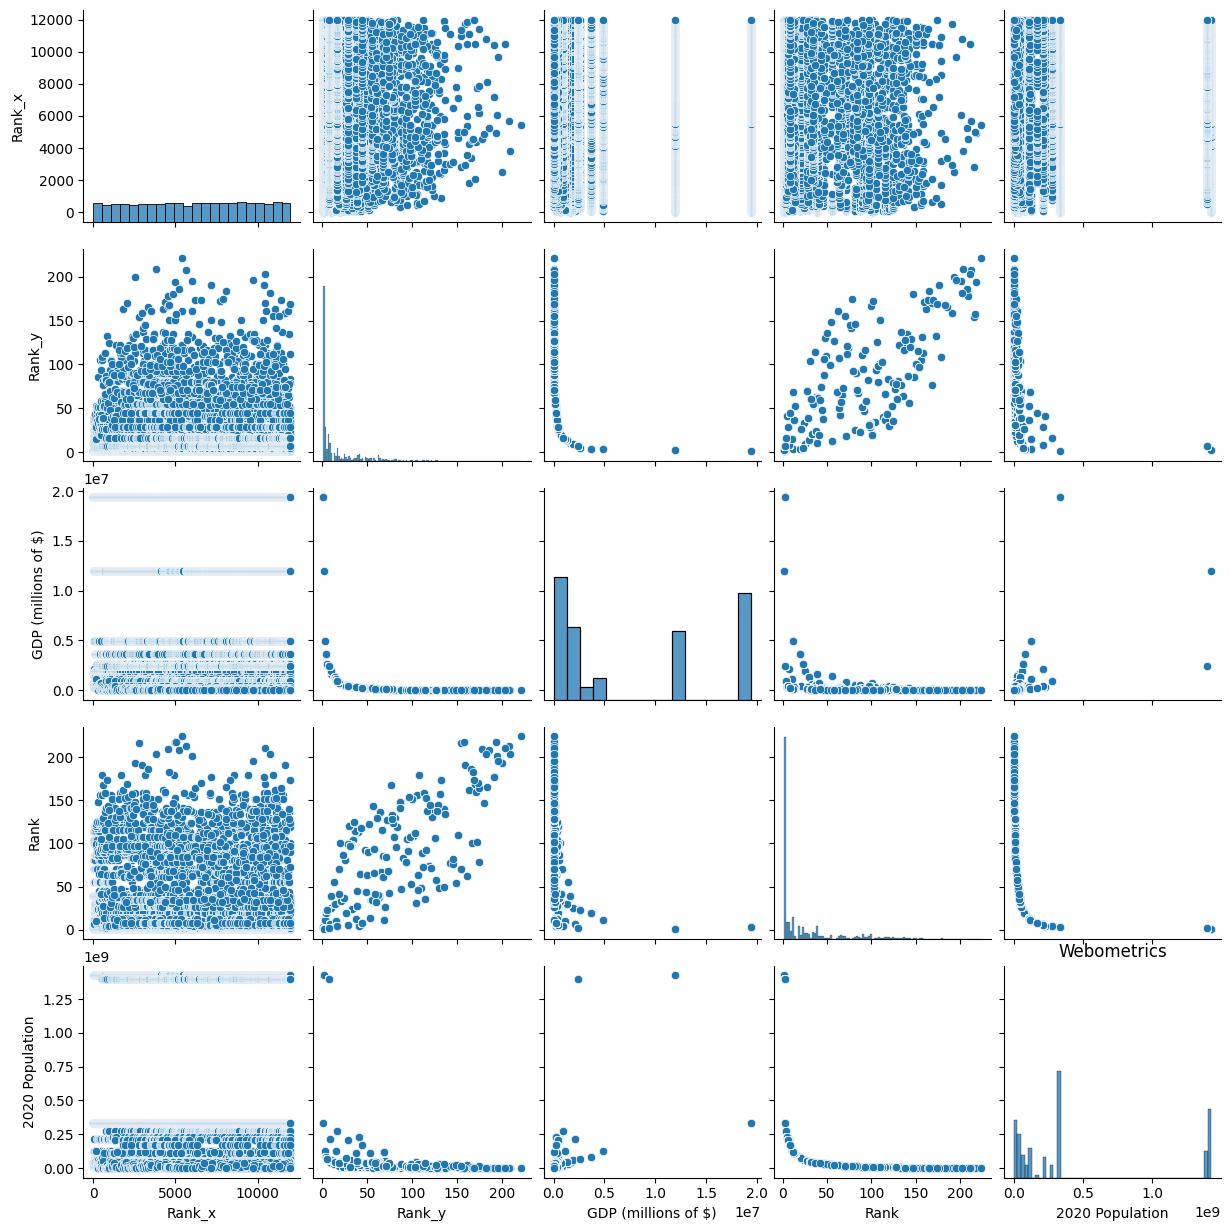

In [82]:
sns.pairplot(df_webometrics_popugdp)
plt.title('Webometrics')